## Importing the Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Dataset

In [13]:
df=pd.read_csv("/content/data.csv.xls")
df

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Preprocessing

In [14]:
df.shape

(10000, 14)

In [15]:
df = df.drop(['Row','Surname'], axis=1)
df

,Id,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
fea=df.columns
fea

Index(['Id', 'Score', 'Nationality', 'Gender', 'Age', 'Tenure', 'Balance',
       'Products', 'Card', 'Active', 'Salary', 'Exited'],
      dtype='object')

In [17]:
df.dtypes

Id               int64
Score            int64
Nationality     object
Gender          object
Age              int64
Tenure           int64
Balance        float64
Products         int64
Card             int64
Active           int64
Salary         float64
Exited           int64
dtype: object

In [18]:
df.isnull().sum()

Id             0
Score          0
Nationality    0
Gender         0
Age            0
Tenure         0
Balance        0
Products       0
Card           0
Active         0
Salary         0
Exited         0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

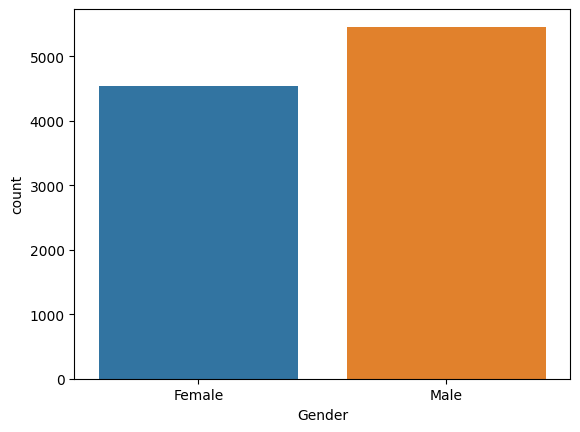

In [19]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Nationality', ylabel='count'>

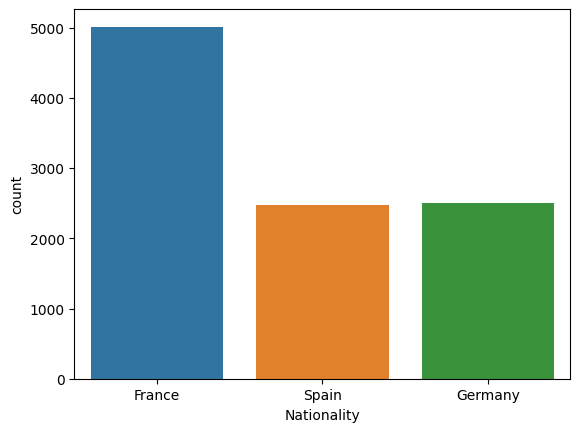

In [20]:
sns.countplot(data=df,x='Nationality')

<Axes: xlabel='Age', ylabel='count'>

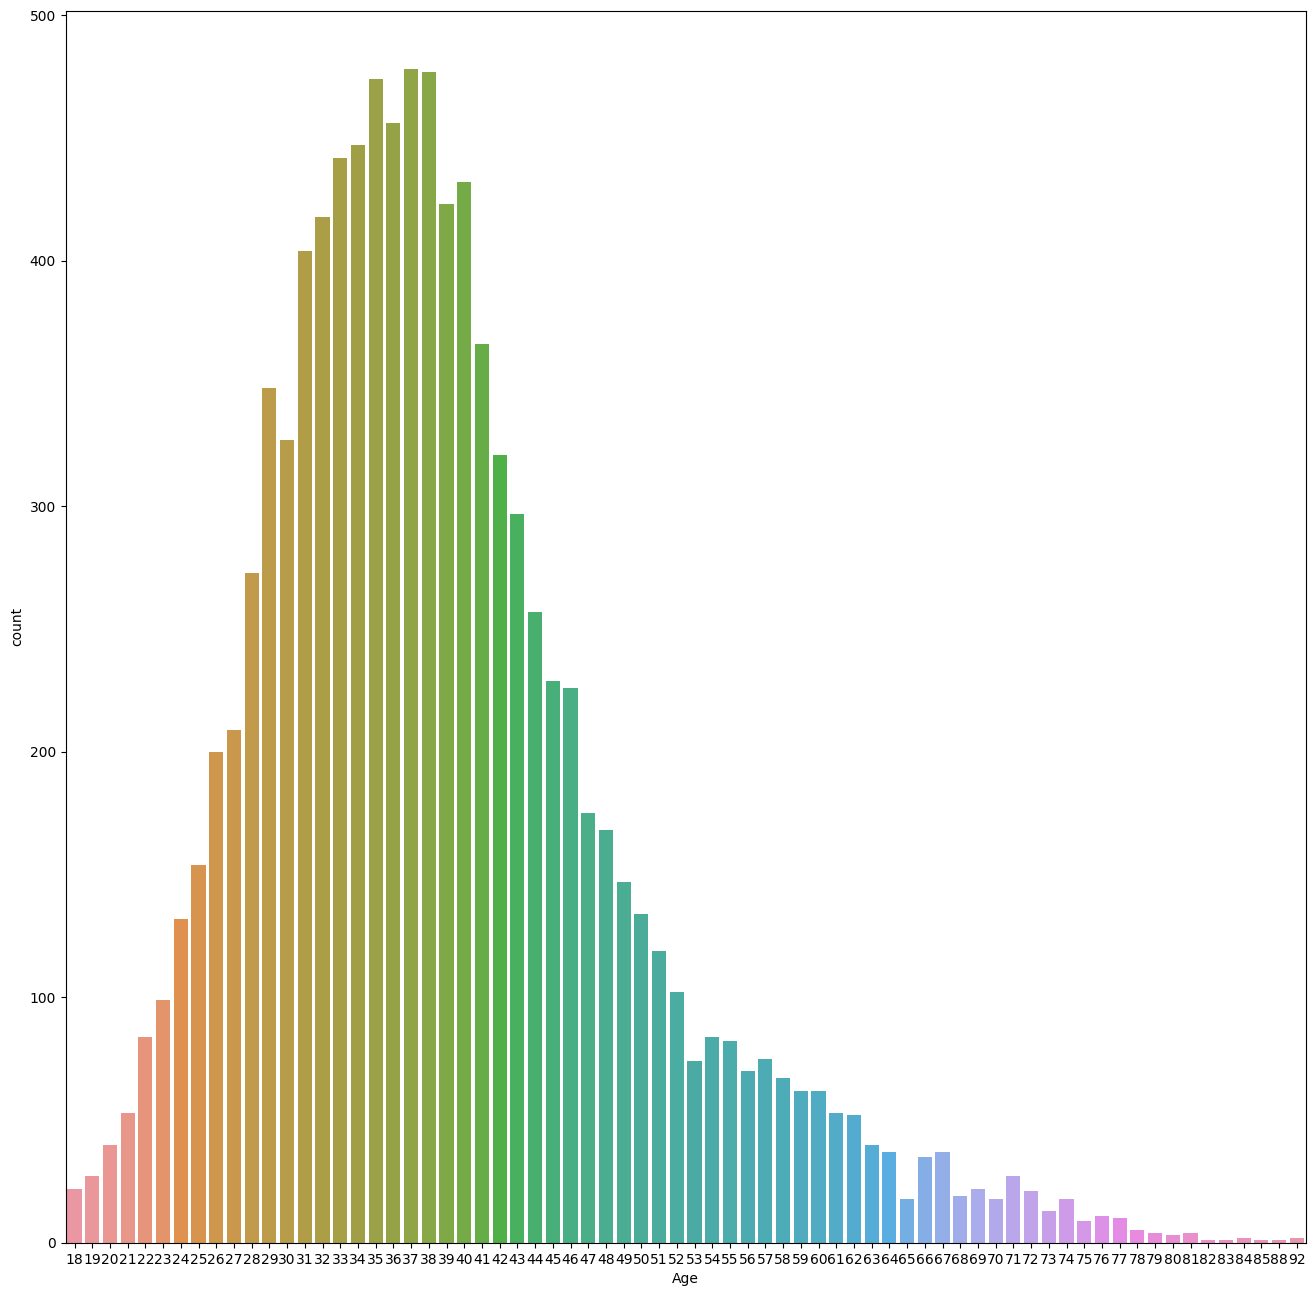

In [21]:
plt.figure(figsize=(16,16))
sns.countplot(data=df,x='Age')

<Axes: xlabel='Card', ylabel='count'>

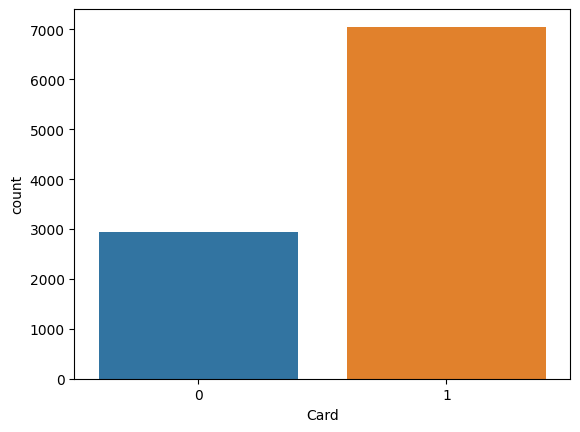

In [22]:
sns.countplot(x='Card',data=df)

<Axes: xlabel='Active', ylabel='count'>

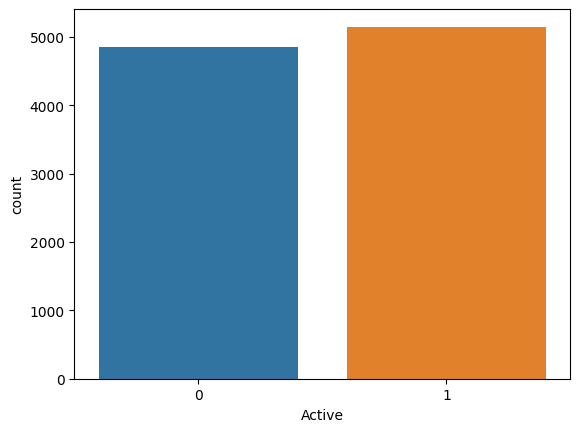

In [23]:
sns.countplot(x='Active',data=df)

<Axes: xlabel='Exited', ylabel='count'>

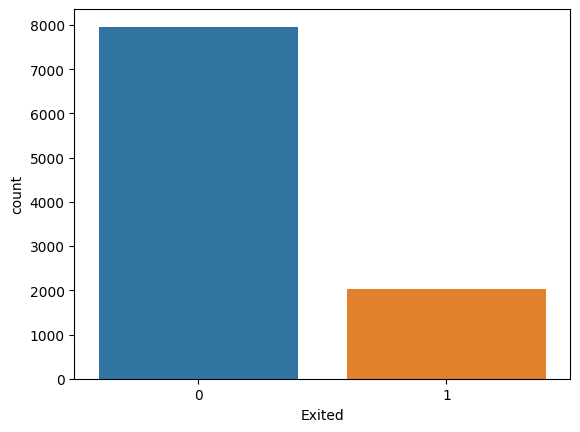

In [24]:
sns.countplot(x='Exited',data=df)

<Axes: xlabel='Products', ylabel='count'>

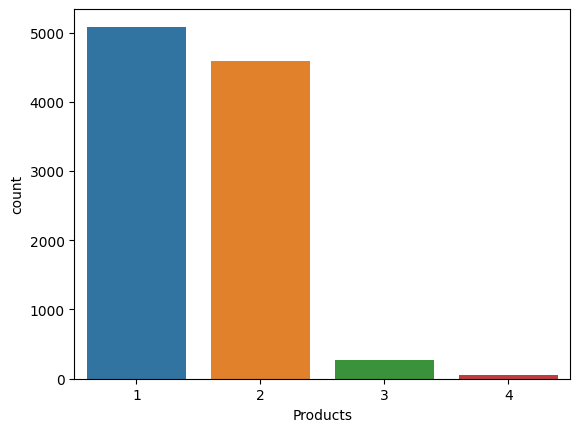

In [25]:
sns.countplot(x='Products',data=df)

<Axes: >

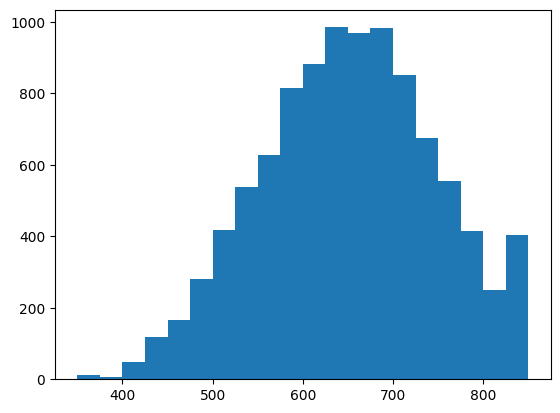

In [26]:
df['Score'].hist(bins=20,grid=False)

In [27]:
k = [i for i in fea if df[i].dtype == 'object']
k

['Nationality', 'Gender']

In [28]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[k] = encoder.fit_transform(df[k])
df

,Id,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,15634602,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0.0,1.0,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0.0,0.0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52,1


## Splitting Data

In [29]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [30]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=42)
x_tr

,Id,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary
9254,15601116,686,0.0,1.0,32,6,0.00,2,1,1,179093.26
1561,15766374,632,1.0,1.0,42,4,119624.60,2,1,1,195978.86
1670,15716994,559,2.0,1.0,24,3,114739.92,1,1,0,85891.02
6087,15730759,561,0.0,0.0,27,9,135637.00,1,1,0,153080.40
6669,15797900,517,0.0,1.0,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...,...
5734,15596647,768,0.0,1.0,54,8,69712.74,1,1,1,69381.05
5191,15681075,682,0.0,0.0,58,1,0.00,1,1,1,706.50
5390,15573851,735,0.0,0.0,38,1,0.00,3,0,0,92220.12
860,15807663,667,0.0,1.0,43,8,190227.46,1,1,0,97508.04


## Building a Classifier using Scikit-learn

**Model Development**

In [31]:
from sklearn.tree import DecisionTreeClassifier
De_cl=DecisionTreeClassifier()
De_cl.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [32]:
y_te

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

## Prediction

In [33]:
y_pred=De_cl.predict(x_te)
y_df=pd.DataFrame({'y_pred':y_pred})
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Visualizing the Predicted Data

<Axes: xlabel='y_pred', ylabel='count'>

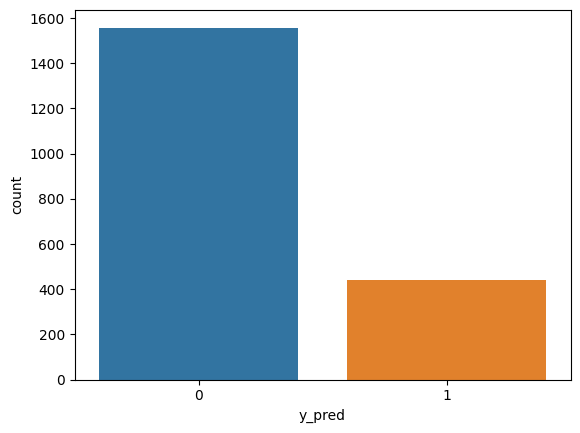

In [34]:
sns.countplot(x='y_pred',data=y_df)

## Model Evaluation

In [46]:
from sklearn.metrics import accuracy_score
DE_acc=accuracy_score(y_te,y_pred)
DE_acc

0.7915

## RandomForest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF_cl=RandomForestClassifier(n_estimators=100)
RF_cl.fit(x_tr,y_tr)

RandomForestClassifier()

In [37]:
RF_pred=RF_cl.predict(x_te)
RF_pred

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
RF_acc=accuracy_score(y_te,y_pred)
RF_acc

0.7915

## XGboost( Extreme Gradient Boost)


In [40]:
from xgboost import XGBClassifier
XG_cl=XGBClassifier(n_estimators=100,learning_rate=0.5)
XG_cl.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
XG_pred=XG_cl.predict(x_te)
XG_pred

array([0, 0, 0, ..., 1, 0, 1])

## Visualizing predicted data

<Axes: xlabel='y_pred', ylabel='count'>

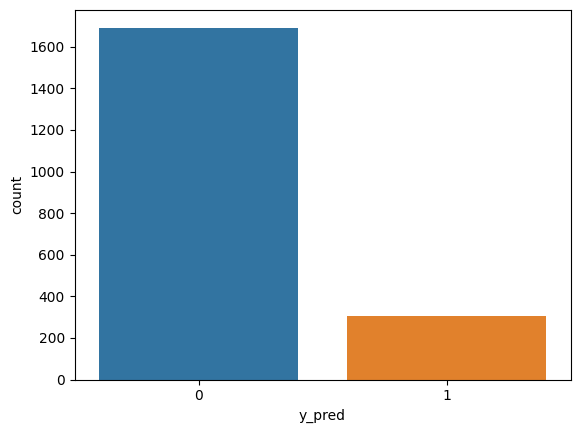

In [43]:
XG_df=pd.DataFrame({'y_pred':XG_pred})
sns.countplot(data=XG_df,x='y_pred')

## Model Evaluation

In [44]:
XG_acc=accuracy_score(y_te,XG_pred)
XG_acc

0.8515

## Visualizing the data for Different Models

In [48]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'Decision Tree', 'Random Forest']
accuracy_scores = [XG_acc, DE_acc, RF_acc]
accuracy_scores

[0.8515, 0.7915, 0.7915]

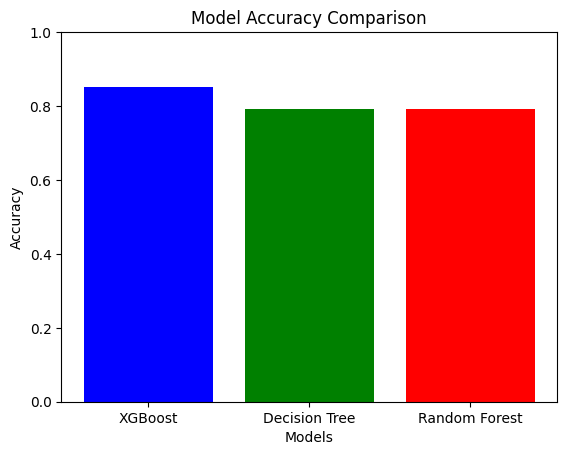

In [49]:
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()